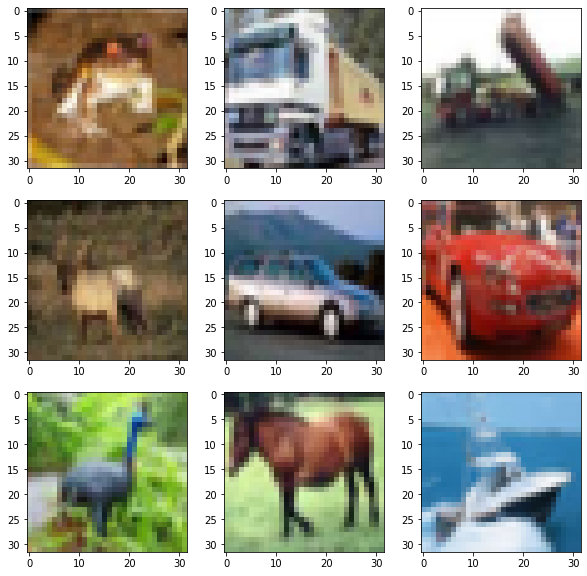

In [96]:
# Plot ad hoc CIFAR10 instances
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import random 

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
plt.figure(figsize=(10,10)) 

for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])

# show the plot
plt.show() 

In [97]:
print("Total number of images in training data :", len(X_train))
print("Total number of images in testing data :",  len(X_test))

Total number of images in training data : 50000
Total number of images in testing data : 10000


**Running the code creates a 3×3 plot of photographs. The images have been scaled up from their small 32×32 size, but you can clearly see trucks, horses, and cars. You can also see some distortion in some images that have been forced to the square aspect ratio.**

** Simple Convolutional Neural Network for CIFAR-10
 **

In [98]:
# Simple CNN model for CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical


**Next, you can load the CIFAR-10 dataset. **

In [99]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Normalisation of images in the **

In [100]:
X_train = X_train.astype("float32") 
X_test = X_test.astype("float32")
# Now, Lets, Normalize the images into (1, 255) 
X_train = X_train/255
X_test = X_test/255

In [101]:
print(X_train.shape) 
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [102]:
# Lets use the Hot one encoding for the target variable
...
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


In [103]:
# CNN Model Build UP
...
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= X_train.shape[1:], padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
#decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary()) 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_29 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               4194816   
                                                     

In [104]:
# Lets train the data
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=2,epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 - 9s - loss: 1.7123 - accuracy: 0.3766 - val_loss: 1.4367 - val_accuracy: 0.4745 - 9s/epoch - 6ms/step
Epoch 2/25
1563/1563 - 9s - loss: 1.3831 - accuracy: 0.5023 - val_loss: 1.2503 - val_accuracy: 0.5486 - 9s/epoch - 6ms/step
Epoch 3/25
1563/1563 - 8s - loss: 1.1948 - accuracy: 0.5761 - val_loss: 1.1185 - val_accuracy: 0.6027 - 8s/epoch - 5ms/step
Epoch 4/25
1563/1563 - 8s - loss: 1.0703 - accuracy: 0.6220 - val_loss: 1.0360 - val_accuracy: 0.6375 - 8s/epoch - 5ms/step
Epoch 5/25
1563/1563 - 8s - loss: 0.9548 - accuracy: 0.6636 - val_loss: 1.0171 - val_accuracy: 0.6453 - 8s/epoch - 5ms/step
Epoch 6/25
1563/1563 - 8s - loss: 0.8543 - accuracy: 0.7018 - val_loss: 0.9699 - val_accuracy: 0.6702 - 8s/epoch - 5ms/step
Epoch 7/25
1563/1563 - 9s - loss: 0.7716 - accuracy: 0.7283 - val_loss: 0.9693 - val_accuracy: 0.6710 - 9s/epoch - 5ms/step
Epoch 8/25
1563/1563 - 9s - loss: 0.7049 - accuracy: 0.7517 - val_loss: 1.0202 - val_accuracy: 0.6512 - 9s/epoch - 6ms/step
Epoch 9/

<AxesSubplot:>

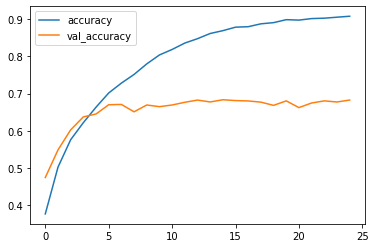

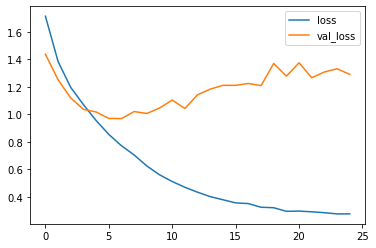

In [105]:

# Evaluation and Measurement 
import pandas as pd
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy", "val_accuracy"]].plot()
evaluation[["loss", "val_loss"]].plot() 

In [106]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 68.28%


In [107]:
# Model performance is not acceptable enough. Hence we need to optimized the model 
# 1. Under performace, we add more layers
# 2. Consider dropout, unit, and optimizer, these are called hyper-parameter tunning

# CNN Model Build UP
...
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= X_train.shape[1:], padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
#decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary()) 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_31 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 128)       73856     
                                                     

In [108]:
# Lets train the data
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=2,epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 - 16s - loss: 1.9080 - accuracy: 0.2813 - val_loss: 1.5515 - val_accuracy: 0.4386 - 16s/epoch - 11ms/step
Epoch 2/25
1563/1563 - 14s - loss: 1.4731 - accuracy: 0.4555 - val_loss: 1.3018 - val_accuracy: 0.5287 - 14s/epoch - 9ms/step
Epoch 3/25
1563/1563 - 14s - loss: 1.2449 - accuracy: 0.5533 - val_loss: 1.2480 - val_accuracy: 0.5517 - 14s/epoch - 9ms/step
Epoch 4/25
1563/1563 - 14s - loss: 1.0926 - accuracy: 0.6124 - val_loss: 0.9945 - val_accuracy: 0.6524 - 14s/epoch - 9ms/step
Epoch 5/25
1563/1563 - 14s - loss: 0.9803 - accuracy: 0.6537 - val_loss: 0.8666 - val_accuracy: 0.6973 - 14s/epoch - 9ms/step
Epoch 6/25
1563/1563 - 14s - loss: 0.9083 - accuracy: 0.6812 - val_loss: 0.7940 - val_accuracy: 0.7245 - 14s/epoch - 9ms/step
Epoch 7/25
1563/1563 - 14s - loss: 0.8611 - accuracy: 0.7016 - val_loss: 0.7977 - val_accuracy: 0.7223 - 14s/epoch - 9ms/step
Epoch 8/25
1563/1563 - 14s - loss: 0.8142 - accuracy: 0.7140 - val_loss: 0.7107 - val_accuracy: 0.7530 - 14s/epoch - 

<AxesSubplot:>

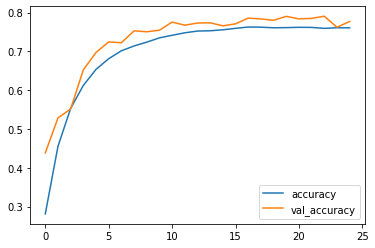

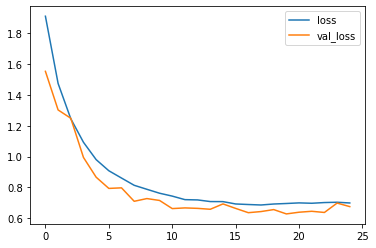

In [109]:

# Evaluation and Measurement 
import pandas as pd
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy", "val_accuracy"]].plot()
evaluation[["loss", "val_loss"]].plot() 

In [110]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.71%


In [111]:
# Saving the model 
model.save("carfi10.h5")

****